### Backpropagation examples in simple perceptrons

Start by considering a single layer feedforward neural network with a single input and single output of the form $z = f(wx + \theta)$ where $f(x)$ is the sigmoid function $1/(1+{\rm exp}(-x))$. In this case, we will update both the weight $w$ and bias $\theta$ in an effort to minimize classification error for the input/output cases $x=0$ implies $z=0.1$ and $x = 1$ implies $z=0.9$. Error is $E = (z-z_{targ})^2$ (squared difference from the target value of the output). As discussed in tutorials, this is accomplished by updating $w \mapsto w - r \frac{\partial E}{\partial w}$ and $\theta \mapsto \theta - r \frac{\partial E}{\partial \theta}$ where $r>0$ is a learning rate and the partial derivatives can be computed by the chain rule:
$$
\frac{\partial E}{\partial w} = \frac{\partial E}{\partial z} \frac{\partial z}{\partial w} = 2(z-z_{targ}) f'(wx + \theta) x
$$
and
$$
\frac{\partial E}{\partial \theta} = \frac{\partial E}{\partial z} \frac{\partial z}{\partial \theta} = 2(z-z_{targ}) f'(wx + \theta),
$$
where the sigmoid's derivative is
$$
f'(x) = \frac{{\rm e}^{-x}}{(1 + {\rm e}^{-x})^2}.
$$
Our code below applies weight and bias updates for each condition in sequence until error $E$ falls below some tolerance for either condition.

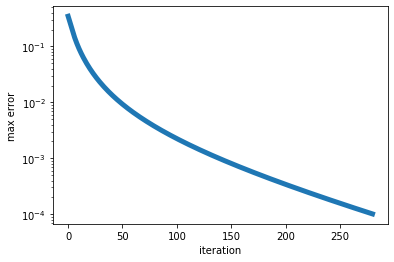

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

# randomize weight and bias
w = rnd.uniform(-1,1,1)
h = rnd.uniform(-1,1,1)
r = 1     # set learning rate
zth = 0.9
ztl = 0.1

# define the sigmoid function and its derivative
def f(x):
    return 1/(1+np.exp(-x))

def fp(x):
    return np.exp(-x)/(1+np.exp(-x))**2

# initialize vector to store the max error across conditions
merr = 1
merrvec = np.zeros(10000)

# now begin training the network to produce an XOR gate
for i in range(10000):
    wo=w   # store old weight value and always update weight first
    
    # forward propagate on each condition to calculate the current max err
    # start with the x=0 and z=0.1 case
    x = 0
    z = f(w*x+h)
    merr = (ztl-z)**2
    
    # then backpropagate based on observed error
    w = w - r*2*(z-ztl)*fp(wo*x+h)*x   # update w, even though won't matter (x=0)
    h = h - r*2*(z-ztl)*fp(wo*x+h)
    # note, we used the old weight value wo in the h update
    wo=w     # reset it now
    
    # then the x=1 and z=0.9 case
    x = 1
    z = f(w*x+h)
    merr = max((z-zth)**2,merr)  # compute max error so far
    merrvec[i] = merr 
    
    # then backpropagate based on observed error
    w = w - r*2*(z-zth)*fp(wo*x+h)*x
    h = h - r*2*(z-zth)*fp(wo*x+h)

    # break the loop is max error is low enough
    if merr<0.0001:
        break
        
fig = plt.figure()       
plt.semilogy(np.arange(i),merrvec[:i],linewidth=5)
plt.xlabel('iteration')
plt.ylabel('max error')
plt.show()

Next, consider a two layer network that gives a nonmonotonic output $z$ as a function of the upstream input $x$. To accomplish this, we use a two unit hidden layer ($y_1$ and $y_2$). The system of three equations is:
$$
y_1 = f(w_1 x + \theta_1), \ \ y_2 = f(w_2 x + \theta_2), \ \ z = f(w_3 y_1 + w_4 y_2 + \theta_3),
$$
so now we have seven parameters to update, four weights and three biases. The partial derivatives with respect to each weight are:
$$
\frac{\partial E}{\partial w_1} = \frac{\partial E}{\partial z} \frac{\partial z}{\partial y_1} \frac{\partial y_1}{\partial w_1} = 2(z-z_{targ}) f'(w_3 y_1 + w_4 y_2 + \theta_3) w_3 f'(w_1 x + \theta_1) x \\
\frac{\partial E}{\partial w_2} = \frac{\partial E}{\partial z} \frac{\partial z}{\partial y_2} \frac{\partial y_2}{\partial w_2} = 2(z-z_{targ}) f'(w_3 y_1 + w_4 y_2 + \theta_3) w_4 f'(w_2 x + \theta_2) x \\
\frac{\partial E}{\partial w_3} = \frac{\partial E}{\partial z} \frac{\partial z}{\partial w_3} = 2(z-z_{targ}) f'(w_3 y_1 + w_4 y_2 + \theta_3) y_1 \\
\frac{\partial E}{\partial w_4} = \frac{\partial E}{\partial z} \frac{\partial z}{\partial w_4} = 2(z-z_{targ}) f'(w_3 y_1 + w_4 y_2 + \theta_3) y_2 \\
\frac{\partial E}{\partial \theta_1} = \frac{\partial E}{\partial z} \frac{\partial z}{\partial y_1} \frac{\partial y_1}{\partial \theta_1} = 2(z-z_{targ}) f'(w_3 y_1 + w_4 y_2 + \theta_3) w_3 f'(w_1 x + \theta_1) \\
\frac{\partial E}{\partial \theta_2} = \frac{\partial E}{\partial z} \frac{\partial z}{\partial y_2} \frac{\partial y_2}{\partial \theta_2} = 2(z-z_{targ}) f'(w_3 y_1 + w_4 y_2 + \theta_3) w_4 f'(w_2 x + \theta_2) \\
\frac{\partial E}{\partial \theta_3} = \frac{\partial E}{\partial z} \frac{\partial z}{\partial \theta_3} = 2(z-z_{targ}) f'(w_3 y_1 + w_4 y_2 + \theta_3).
$$
Again, we will update all parameters after comparing each condition. Our conditions for this neural network are $x=0$ and $x=2$ imply $z=0.1$ and $x=1$ implies $z=0.9$.

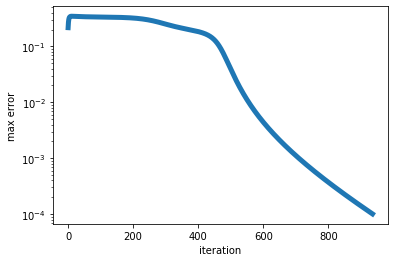

In [11]:
# randomize weight and bias
w1 = rnd.uniform(-1,1,1)
w2 = rnd.uniform(-1,1,1)
w3 = rnd.uniform(-1,1,1)
w4 = rnd.uniform(-1,1,1)
h1 = rnd.uniform(-1,1,1)
h2 = rnd.uniform(-1,1,1)
h3 = rnd.uniform(-1,1,1)
r = 1     # set learning rate
zth = 0.9
ztl = 0.1

# define the sigmoid function and its derivative
def f(x):
    return 1/(1+np.exp(-x))

def fp(x):
    return np.exp(-x)/(1+np.exp(-x))**2

# initialize vector to store the max error across conditions
merr = 1
merrvec = np.zeros(10000)

# now begin training the network to produce an XOR gate
for i in range(10000):
    w1o=w1   # store old weight value and always update weight first
    w2o=w2
    w3o=w3
    w4o=w4
    h1o=h1
    h2o=h2
    h3o=h3
    
    # forward propagate on each condition to calculate the current max err
    # start with the x=0 and z=0.1 case
    x = 0
    y1 = f(w1o*x+h1o)
    y2 = f(w2o*x+h2o)
    z = f(w3o*y1+w4o*y2+h3o)
    merr = (ztl-z)**2
    
    # then backpropagate based on observed error (exluding updates involving x=0)
    w3 = w3-2*(z-ztl)*fp(w3o*y1+w4o*y2+h3o)*y1
    w4 = w4-2*(z-ztl)*fp(w3o*y1+w4o*y2+h3o)*y2
    h1 = h1-2*(z-ztl)*fp(w3o*y1+w4o*y2+h3o)*w3o*fp(w1o*x+h1o)
    h2 = h2-2*(z-ztl)*fp(w3o*y1+w4o*y2+h3o)*w4o*fp(w2o*x+h2o)
    h3 = h3-2*(z-ztl)*fp(w3o*y1+w4o*y2+h3o)

    w1o=w1   # store old weight value and always update weight first
    w2o=w2
    w3o=w3
    w4o=w4
    h1o=h1
    h2o=h2
    h3o=h3
    
    # forward propagate on each condition to calculate the current max err
    # start with the x=0 and z=0.1 case
    x = 1
    y1 = f(w1o*x+h1o)
    y2 = f(w2o*x+h2o)
    z = f(w3o*y1+w4o*y2+h3o)
    merr = max((zth-z)**2,merr)
    
    # then backpropagate based on observed error (exluding updates involving x=0)
    w1 = w1-2*(z-zth)*fp(w3o*y1+w4o*y2+h3o)*w3o*fp(w1o*x+h1o)*x
    w2 = w2-2*(z-zth)*fp(w3o*y1+w4o*y2+h3o)*w4o*fp(w2o*x+h2o)*x
    w3 = w3-2*(z-zth)*fp(w3o*y1+w4o*y2+h3o)*y1
    w4 = w4-2*(z-zth)*fp(w3o*y1+w4o*y2+h3o)*y2
    h1 = h1-2*(z-zth)*fp(w3o*y1+w4o*y2+h3o)*w3o*fp(w1o*x+h1o)
    h2 = h2-2*(z-zth)*fp(w3o*y1+w4o*y2+h3o)*w4o*fp(w2o*x+h2o)
    h3 = h3-2*(z-zth)*fp(w3o*y1+w4o*y2+h3o)
    
    w1o=w1   # store old weight value and always update weight first
    w2o=w2
    w3o=w3
    w4o=w4
    h1o=h1
    h2o=h2
    h3o=h3
    
    # forward propagate on each condition to calculate the current max err
    # start with the x=0 and z=0.1 case
    x = 2
    y1 = f(w1o*x+h1o)
    y2 = f(w2o*x+h2o)
    z = f(w3o*y1+w4o*y2+h3o)
    merr = max((ztl-z)**2,merr)
    merrvec[i] = merr
    
    # then backpropagate based on observed error (exluding updates involving x=0)
    w1 = w1-2*(z-ztl)*fp(w3o*y1+w4o*y2+h3o)*w3o*fp(w1o*x+h1o)*x
    w2 = w2-2*(z-ztl)*fp(w3o*y1+w4o*y2+h3o)*w4o*fp(w2o*x+h2o)*x
    w3 = w3-2*(z-ztl)*fp(w3o*y1+w4o*y2+h3o)*y1
    w4 = w4-2*(z-ztl)*fp(w3o*y1+w4o*y2+h3o)*y2
    h1 = h1-2*(z-ztl)*fp(w3o*y1+w4o*y2+h3o)*w3o*fp(w1o*x+h1o)
    h2 = h2-2*(z-ztl)*fp(w3o*y1+w4o*y2+h3o)*w4o*fp(w2o*x+h2o)
    h3 = h3-2*(z-ztl)*fp(w3o*y1+w4o*y2+h3o)

    # break the loop is max error is low enough
    if merr<0.0001:
        break
        
fig = plt.figure()       
plt.semilogy(np.arange(i),merrvec[:i],linewidth=5)
plt.xlabel('iteration')
plt.ylabel('max error')
plt.show()